In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_sensor = pd.read_csv('dsp/sensor.csv')
df_sensor.rename(columns={df_sensor.columns[0]:'machine_id'}, inplace=True)

df0 = df_sensor
print(df0.shape, end='\n\n')
print("Unique value count in column: ",
      df0['machine_status'].value_counts())

(220320, 55)

Unique value count in column:  machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


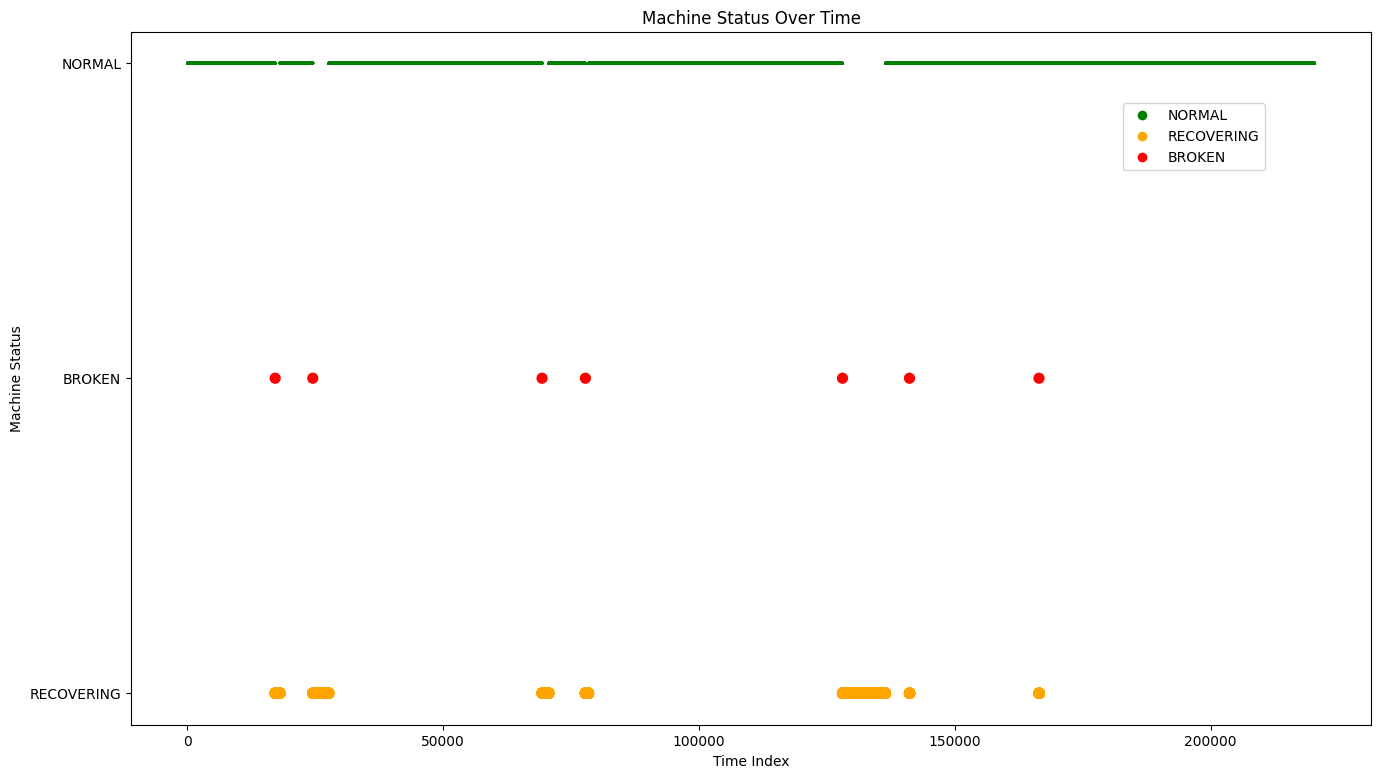

In [3]:
# Create size array based on machine status
sizes = df0['machine_status'].map({'NORMAL': 1, 'RECOVERING': 50, 'BROKEN': 50})

enc_s = ['NORMAL', 'RECOVERING', 'BROKEN']
enc_v = [ 2,        0,            1]
enc_c = ['green',  'orange',      'red']

df0['machine_status_enc'] = df_sensor['machine_status'].map(dict(zip(enc_s, enc_v)))
colors = df0['machine_status_enc'].map(dict(zip(enc_v, enc_c)))

plt.figure(figsize=(16, 9))

plt.scatter(df0.index, df0['machine_status_enc'], c=colors, s=sizes,)# alpha=0.5)
plt.yticks(enc_v, enc_s)
plt.ylabel('Machine Status')
plt.xlabel('Time Index')
plt.title('Machine Status Over Time')
plt.legend(handles=[
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='NORMAL'),
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='RECOVERING'),
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='BROKEN')
], loc=(0.8, 0.8))
#plt.grid(True, alpha=0.3)

#plt.figure()
#plt.plot(df0.index, df0['machine_status_enc'], linewidth=0.5)

Timestamps and state where machine_status changes:
TS : New State = 2018-04-01 00:00:00 : NORMAL
TS : New State = 2018-04-12 21:54:00 : NORMAL
TS : New State = 2018-04-12 21:55:00 : BROKEN
TS : New State = 2018-04-12 21:56:00 : RECOVERING
TS : New State = 2018-04-13 13:39:00 : RECOVERING
TS : New State = 2018-04-13 13:40:00 : NORMAL
TS : New State = 2018-04-18 00:29:00 : NORMAL
TS : New State = 2018-04-18 00:30:00 : BROKEN
TS : New State = 2018-04-18 00:31:00 : RECOVERING
TS : New State = 2018-04-20 04:20:00 : RECOVERING
TS : New State = 2018-04-20 04:21:00 : NORMAL
TS : New State = 2018-05-19 03:17:00 : NORMAL
TS : New State = 2018-05-19 03:18:00 : BROKEN
TS : New State = 2018-05-19 03:19:00 : RECOVERING
TS : New State = 2018-05-20 01:10:00 : RECOVERING
TS : New State = 2018-05-20 01:11:00 : NORMAL
TS : New State = 2018-05-25 00:29:00 : NORMAL
TS : New State = 2018-05-25 00:30:00 : BROKEN
TS : New State = 2018-05-25 00:31:00 : RECOVERING
TS : New State = 2018-05-25 10:35:00 : RECOVERI

([<matplotlib.axis.YTick at 0x7f564cb5fd10>,
 [Text(0, 2, 'NORMAL'), Text(0, 0, 'RECOVERING'), Text(0, 1, 'BROKEN')])

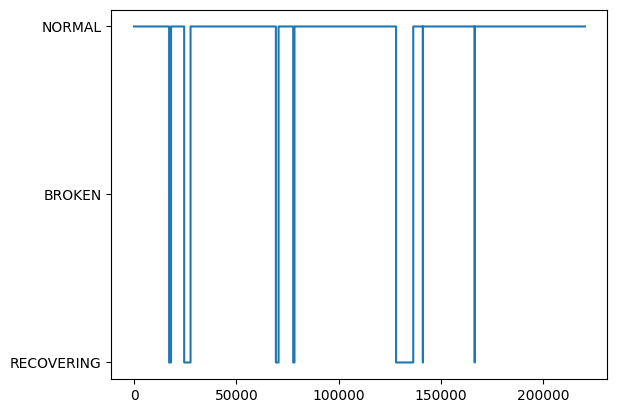

In [4]:
status_changes_mask = df0['machine_status'].ne(df0['machine_status'].shift())
status_changes_mask_b = df0['machine_status'].ne(df0['machine_status'].shift(-1))
status_changes_mask_f = df0['machine_status'].ne(df0['machine_status'].shift(1))
status_change_mask_full = status_changes_mask_b | status_changes_mask_f

status_changes_mask = status_change_mask_full

change_timestamps = df0.loc[status_changes_mask, 'timestamp']
status_changes = df0.loc[status_changes_mask, 'machine_status']
print("Timestamps and state where machine_status changes:")
for ts, state in zip(change_timestamps, status_changes):
    print(f"TS : New State = {ts} : {state}")

enc_s = ['NORMAL', 'RECOVERING', 'BROKEN']
enc_v = [ 2,        0,            1]
enc_c = ['green',  'orange',      'red']

plt.plot(status_changes.index, status_changes.map(dict(zip(enc_s, enc_v))))
plt.yticks(enc_v, enc_s)

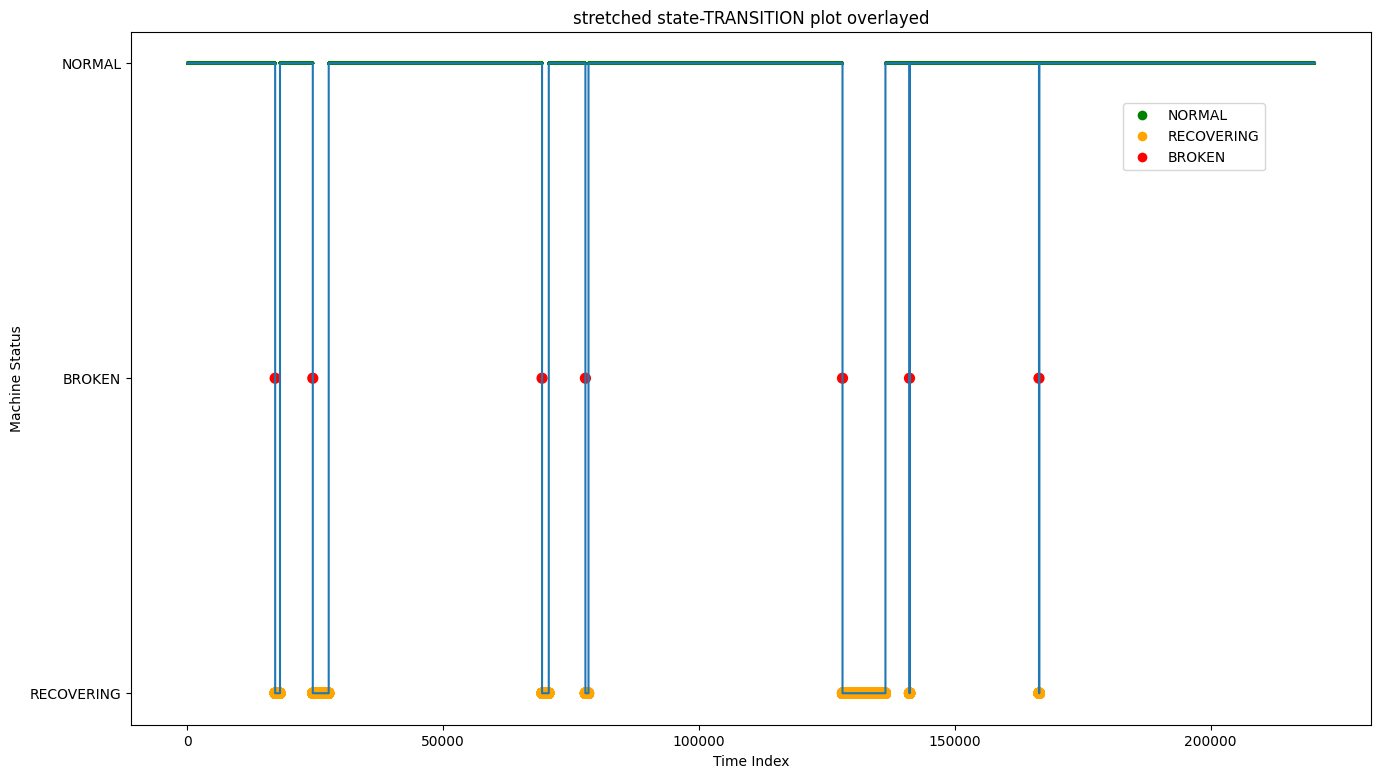

In [ ]:
# Reinint to avoid carry-forwarding from prev experiment-code
status_changes_mask = df0['machine_status'].ne(df0['machine_status'].shift())
enc_s = ['NORMAL', 'RECOVERING', 'BROKEN']
enc_v = [ 2,        0,            1]
enc_c = ['green',  'orange',      'red']

df0['machine_status_enc'] = df0['machine_status'].map(dict(zip(enc_s, enc_v)))
colors = df0['machine_status_enc'].map(dict(zip(enc_v, enc_c)))

plt.figure(figsize=(16, 9))
sizes_clm = df0['machine_status'].map({'NORMAL': 1, 'RECOVERING': 50, 'BROKEN': 50})
plt.scatter(df0.index, df0['machine_status_enc'], c=colors, s=sizes_clm,)# alpha=0.5)
plt.yticks(enc_v, enc_s)
plt.ylabel('Machine Status')
plt.xlabel('Time Index')
plt.title('stretched state-TRANSITION plot overlayed')
plt.legend(handles=[
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='NORMAL'),
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='RECOVERING'),
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='BROKEN')
], loc=(0.8, 0.8))
#plt.grid(True, alpha=0.3)

plt.plot(status_changes.index, status_changes.map(dict(zip(enc_s, enc_v))), )
plt.scatter(status_changes.index, status_changes.map(dict(zip(enc_s, enc_v))), c='black', s=100, marker='x', linewidths=2, label='Status Changes')

In [6]:
try:
	df0['timestamp_ns'] = df0['timestamp'].astype('datetime64[ns]')
except Exception as e:
	print(f"Error converting timestamp: {e}")

print("Successfully converted ALL timestamp column to datetime.")
#print(df0[['timestamp', 'timestamp_ns']].dtypes)

time_ns = df0.loc[status_changes_mask, 'timestamp_ns']
# print(timestamps)
timestamp_diff = time_ns.diff().fillna(pd.Timedelta(seconds=0))
#print(timestamp_diff)

# print only every 3rd value ==> Total RECOVERING time
for i in range(1, len(timestamp_diff)):
	if i % 3 == 0:
		print(f"Recovery time: {timestamp_diff.iloc[i]}")

Successfully converted ALL timestamp column to datetime.
Recovery time: 0 days 15:44:00
Recovery time: 2 days 03:50:00
Recovery time: 0 days 21:52:00
Recovery time: 0 days 10:05:00
Recovery time: 5 days 19:50:00
Recovery time: 0 days 00:41:00
Recovery time: 0 days 01:15:00


In [7]:
# Remove rows with machine_status = RECOVERING
df1 = df0[df0['machine_status'] != 'RECOVERING']
print(df1['machine_status'].value_counts())
print(df1.shape)

machine_status
NORMAL    205836
BROKEN         7
Name: count, dtype: int64
(205843, 57)


(220320,)
machine_status
False    220313
True          7
Name: count, dtype: int64
        machine_id        timestamp_ns machine_status
17155        17155 2018-04-12 21:55:00         BROKEN
24510        24510 2018-04-18 00:30:00         BROKEN
69318        69318 2018-05-19 03:18:00         BROKEN
77790        77790 2018-05-25 00:30:00         BROKEN
128040      128040 2018-06-28 22:00:00         BROKEN
141131      141131 2018-07-08 00:11:00         BROKEN
166440      166440 2018-07-25 14:00:00         BROKEN
        machine_id        timestamp_ns machine_status
166436      166436 2018-07-25 13:56:00         NORMAL
166437      166437 2018-07-25 13:57:00         NORMAL
166438      166438 2018-07-25 13:58:00         NORMAL
166439      166439 2018-07-25 13:59:00         NORMAL
166440      166440 2018-07-25 14:00:00         BROKEN
(220320,)
machine_status
True     166441
False     53879
Name: count, dtype: int64
(166441, 57)


/tmp/ipykernel_2672364/427187913.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_keep_rows = mask_keep_rows.fillna(False)


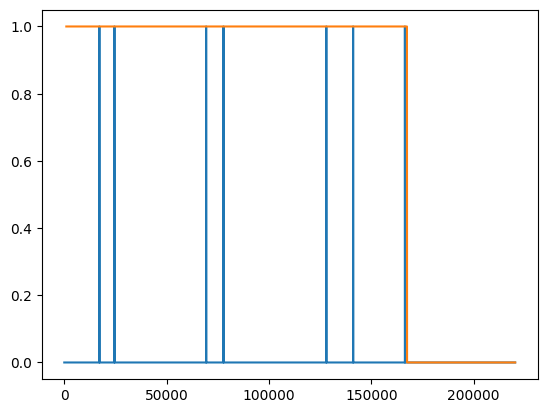

In [12]:
mask_broken = df0['machine_status'] == 'BROKEN'
print(mask_broken.shape)
print(mask_broken.value_counts())
print(df0[mask_broken][['machine_id', 'timestamp_ns', 'machine_status']])
mask_keep_rows = mask_broken.where(mask_broken).bfill()
mask_keep_rows = mask_keep_rows.fillna(False)

df00 = df0[mask_keep_rows]
print(df00.tail(5)[['machine_id', 'timestamp_ns', 'machine_status']])

print(mask_keep_rows.shape)
print(mask_keep_rows.value_counts())
print(df00.shape)

plt.plot(mask_broken.index, mask_broken)
plt.plot(mask_keep_rows.index, mask_keep_rows.shift(1000)) # shift for just visualization

In [16]:
df0 = df00
mask_broken = df0['machine_status'] == 'BROKEN'
mask_broken_minus_one = mask_broken.shift(-1)
mask_broken_plus_one = mask_broken.shift(1)
mask_broken_minus_five = mask_broken.shift(-5)
mask_broken_minus_ten = mask_broken.shift(-10)

mask_around_broken = mask_broken | mask_broken_minus_one | mask_broken_plus_one
# print(df0[mask_around_broken][['timestamp_ns', 'machine_status']])

col_timestamps_at_broken = df0['timestamp_ns'].where(mask_broken)
# print(col_timestamps_at_broken.shape)
col_timestamps_at_broken.head(10)

status_changes_mask.iloc[-1]

col_timestamps_at_broken = col_timestamps_at_broken.bfill()
df0['rul'] = col_timestamps_at_broken - df0['timestamp_ns']
#df0['rul'].head()

# Convert rul to FLOAT hours
df0['rul'] = df0['rul'].dt.total_seconds() / 3600
#df0['rul'].head()

/tmp/ipykernel_2672364/1209871062.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['rul'] = col_timestamps_at_broken - df0['timestamp_ns']
/tmp/ipykernel_2672364/1209871062.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['rul'] = df0['rul'].dt.total_seconds() / 3600


In [17]:
# Remove rows with machine_status = RECOVERING
df01 = df0[df0['machine_status'] != 'RECOVERING']
print(df01['machine_status'].value_counts())
print(df01.shape)

df0 = df01

machine_status
NORMAL    152032
BROKEN         7
Name: count, dtype: int64
(152039, 58)


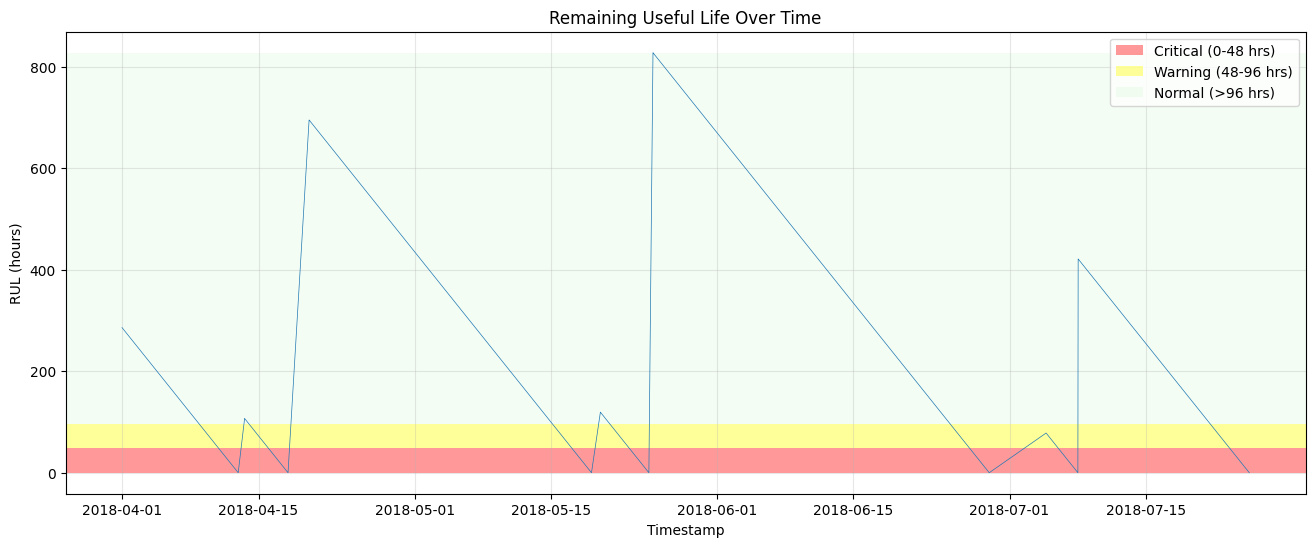

In [18]:
plt.figure(figsize=(16, 6))
plt.plot(df0['timestamp_ns'], df0['rul'], linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('RUL (hours)')
plt.title('Remaining Useful Life Over Time')
plt.grid(True, alpha=0.3)
#plt.tight_layout()
#plt.show()

# Define sensor columns for later use
sensor_cols = [col for col in df0.columns if col.startswith('sensor_')]

# Add colored regions to highlight different RUL ranges
plt.axhspan(0, 48, facecolor='red', alpha=0.4, label='Critical (0-48 hrs)')
plt.axhspan(48, 96, facecolor='yellow', alpha=0.4, label='Warning (48-96 hrs)')
plt.axhspan(96, df0['rul'].max(), facecolor='lightgreen', alpha=0.1, label='Normal (>96 hrs)')
plt.legend(loc='upper right')

In [28]:
# EDA -- Missing values

sr_mv = df0.isna().sum().sort_values(ascending=False)
print(sr_mv.head(20))

sensor_15    152039
sensor_50     23133
sensor_51     12382
sensor_30       261
sensor_29        72
sensor_32        68
sensor_01        60
sensor_18        46
sensor_17        46
sensor_22        41
sensor_25        36
sensor_16        31
sensor_14        21
sensor_26        20
sensor_41        19
sensor_43        19
sensor_49        19
sensor_48        19
sensor_47        19
sensor_46        19
dtype: int64


In [29]:
# Print summary statistics for sensor_15 and sensor_50 by machine_status
print(f"sensor_15 missing: {df0['sensor_15'].isna().sum()} ({df0['sensor_15'].isna().sum()/len(df0)*100:.2f}%)")
print(f"sensor_50 missing: {df0['sensor_50'].isna().sum()} ({df0['sensor_50'].isna().sum()/len(df0)*100:.2f}%)")

sensor_15 missing: 152039 (100.00%)
sensor_50 missing: 23133 (15.22%)


In [30]:
# EDA - Delete column 15
print(df0.shape[0] - df0['sensor_15'].isna().sum())
df1 = df0.drop(columns=['sensor_15'])

0


valid entries:  128906
128860


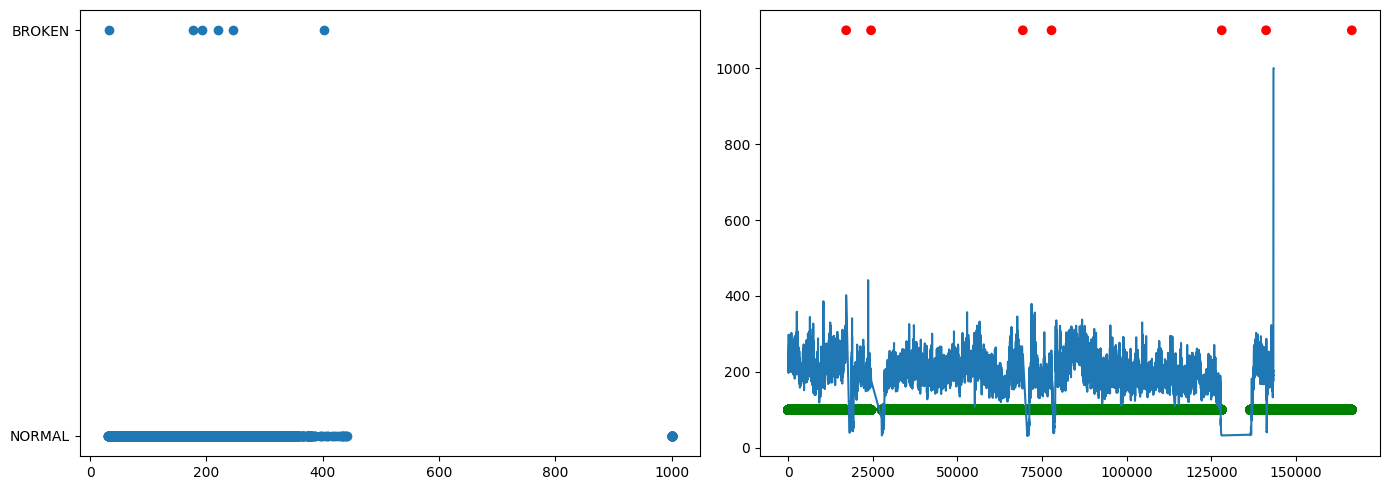

In [43]:
# EDA - column-50
print('valid entries: ', df1.shape[0] - df1['sensor_50'].isna().sum())

# count 'sensor_50' col entries with value > 600
print((df1['sensor_50'] <= 600).sum())
#print(df1[df1['sensor_50'] > 600]['sensor_50'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(df1['sensor_50'], df1['machine_status'])
axes[1].plot(df1.index, df1['sensor_50'])

df1['machine_status_enc'] = df1['machine_status'].map({'NORMAL': 100, 'RECOVERING': 600, 'BROKEN': 1100})
colors = df1['machine_status'].map({'NORMAL': 'green', 'RECOVERING': 'orange', 'BROKEN': 'red'})
axes[1].scatter(df1.index, df1['machine_status_enc'], c = colors)

plt.tight_layout()
plt.show()

In [32]:
# EDA - Delete column-50
df2 = df1.drop(columns=['sensor_50'])

In [69]:
sr_mv = df2.isna().sum().sort_values(ascending=False)
print(sr_mv.head(20))

sensor_51    12382
sensor_30      261
sensor_29       72
sensor_32       68
sensor_01       60
sensor_17       46
sensor_18       46
sensor_22       41
sensor_25       36
sensor_16       31
sensor_14       21
sensor_26       20
sensor_42       19
sensor_41       19
sensor_39       19
sensor_38       19
sensor_44       19
sensor_43       19
sensor_45       19
sensor_46       19
dtype: int64


count    139657.000000
mean        199.181187
std          69.467680
min          30.960648
25%         179.398100
50%         195.601900
75%         213.831000
max        1000.000000
Name: sensor_51, dtype: float64


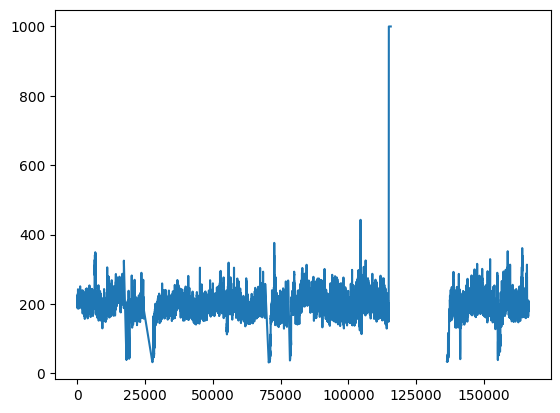

In [131]:
print(df2['sensor_51'].describe())
plt.figure()
plt.plot(df2.index, df2['sensor_51'])

#plt.figure()
#plt.boxplot(df2['sensor_51'])


In [132]:
#df3 = df2.drop(columns=['sensor_51'])

In [133]:
df3 = df2
sr_mv = df3.isna().sum().sort_values(ascending=False)
#print(sr_mv)

sr_mv = sr_mv[sr_mv != 0]
#print(sr_mv)

# Fill missing values with column means for each column in sr_mv
for col in sr_mv.index:
	df3[col].fillna(df3[col].mean(), inplace=True)

df4 = df3

sr_mv = df4.isna().sum().sort_values(ascending=False)
#print(sr_mv)
sr_mv = sr_mv[sr_mv != 0]
print(sr_mv)
#df4 = df3.fillna(df3.mean())

Series([], dtype: int64)


/tmp/ipykernel_2672364/2433893730.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna(df3[col].mean(), inplace=True)


In [134]:
df5 = df4
df5 = df5.drop(columns=['machine_status', 'machine_status_enc', 'timestamp_ns',])
print(df5.shape)

cols = df5.columns
#print(df5.columns)
for col in cols:
	if col in ['machine_id', 'timestamp', 'rul']:
		continue

	# Check if any outliers and replace them with mode
	if df5[col].std() > 0:
		mean = df5[col].mean()
		std = df5[col].std()
		outliers = (df5[col] < mean - 2*std) | (df5[col] > mean + 2*std)
		if outliers.sum() > 0:
			mode_val = df5[col].mode()[0]
			df5.loc[outliers, col] = mode_val


(152039, 53)


In [135]:
df_rul = df5
#! pwd
#! ls
df_rul.to_csv('rul_hrs.csv', index=False)
print(f"Saved df_rul to 'rul_hrs.csv' with shape {df_rul.shape}")

Saved df_rul to 'rul_hrs.csv' with shape (152039, 53)


In [136]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=['x', 'y', 'z'])
print(df)
print(dict(zip(df.columns, df.dtypes)))

rc = len(df)
for clm in df.columns:
	df.loc[rc, clm] = df[clm].sum()

print(df)
print(dict(zip(df.columns, df.dtypes)))

   x  y  z
0  1  2  3
1  4  5  6
{'x': dtype('int64'), 'y': dtype('int64'), 'z': dtype('int64')}
     x    y    z
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  5.0  7.0  9.0
{'x': dtype('float64'), 'y': dtype('float64'), 'z': dtype('float64')}


In [137]:
df_rul = pd.read_csv('rul_hrs.csv')

print(f"\nDataset Shape: {df_rul.shape}")
print(f"Number of Records: {df_rul.shape[0]}")
print(f"Number of Features: {df_rul.shape[1]}")


Dataset Shape: (152039, 53)
Number of Records: 152039
Number of Features: 53


In [138]:
#print(df_rul.isnull().sum())
#print(df_rul.describe())
#print(df_rul.dtypes)

In [139]:
# convert the timestamp column in df_rul to datetime
try:
	df_rul['timestamp_ns'] = pd.to_datetime(df_rul['timestamp'], errors='raise')
except Exception as e:
	print(f"Error converting timestamp: {e}")

print("Successfully converted ALL timestamp column to datetime.")
print(f"Time Range: {df_rul['timestamp_ns'].min()} to {df_rul['timestamp_ns'].max()}")
print(f"Duration: {df_rul['timestamp_ns'].max() - df_rul['timestamp_ns'].min()}")

Successfully converted ALL timestamp column to datetime.
Time Range: 2018-04-01 00:00:00 to 2018-07-25 14:00:00
Duration: 115 days 14:00:00


In [140]:
# df_rul.drop(columns=['timestamp'], inplace=True)

In [141]:
import pprint
pprint.pprint(dict(zip(df_rul.columns, df_rul.dtypes)))

{'machine_id': dtype('int64'),
 'rul': dtype('float64'),
 'sensor_00': dtype('float64'),
 'sensor_01': dtype('float64'),
 'sensor_02': dtype('float64'),
 'sensor_03': dtype('float64'),
 'sensor_04': dtype('float64'),
 'sensor_05': dtype('float64'),
 'sensor_06': dtype('float64'),
 'sensor_07': dtype('float64'),
 'sensor_08': dtype('float64'),
 'sensor_09': dtype('float64'),
 'sensor_10': dtype('float64'),
 'sensor_11': dtype('float64'),
 'sensor_12': dtype('float64'),
 'sensor_13': dtype('float64'),
 'sensor_14': dtype('float64'),
 'sensor_16': dtype('float64'),
 'sensor_17': dtype('float64'),
 'sensor_18': dtype('float64'),
 'sensor_19': dtype('float64'),
 'sensor_20': dtype('float64'),
 'sensor_21': dtype('float64'),
 'sensor_22': dtype('float64'),
 'sensor_23': dtype('float64'),
 'sensor_24': dtype('float64'),
 'sensor_25': dtype('float64'),
 'sensor_26': dtype('float64'),
 'sensor_27': dtype('float64'),
 'sensor_28': dtype('float64'),
 'sensor_29': dtype('float64'),
 'sensor_30': d

In [142]:
print("\n" + "=" * 80)
print("MISSING VALUES")
print("=" * 80)
missing_values = df_rul.isnull().sum()
missing_percentage = (missing_values / len(df_rul)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing_Count'] > 0])
if missing_df['Missing_Count'].sum() == 0:
	print("No missing values found!")



MISSING VALUES
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []
No missing values found!


In [143]:
print("\n" + "=" * 80)
print("TARGET VARIABLE (RUL) ANALYSIS")
print("=" * 80)
print(f"RUL Mean: {df_rul['rul'].mean():.2f}")
print(f"RUL Median: {df_rul['rul'].median():.2f}")
print(f"RUL Std: {df_rul['rul'].std():.2f}")
print(f"RUL Min: {df_rul['rul'].min():.2f}")
print(f"RUL Max: {df_rul['rul'].max():.2f}")



TARGET VARIABLE (RUL) ANALYSIS
RUL Mean: 287.78
RUL Median: 240.60
RUL Std: 221.80
RUL Min: 0.00
RUL Max: 827.40


In [144]:
print(df_rul.shape)
print(df_rul['timestamp_ns'].unique().size)

(152039, 54)
152039


In [145]:
print(df_rul.shape)
print(df_rul['rul'].unique().size)

# print first 10 unique values of 'rul' column
rul_10_uvs = df_rul['rul'].unique()[:10]
print(rul_10_uvs)


(152039, 54)
49645
[285.91666667 285.9        285.88333333 285.86666667 285.85
 285.83333333 285.81666667 285.8        285.78333333 285.76666667]


In [146]:
# set df print format to not wraparound
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

# print the rows where 'rul' is present in the rul_10_uvs array and group by 'rul' column
# print on columns ['timestamp_ns', 'sensor_00', 'sensor_01', 'sensor_02', 'rul']
print(df_rul[df_rul['rul'].isin(rul_10_uvs)].sort_values(by='rul')[['timestamp_ns', 'sensor_00', 'sensor_01', 'sensor_02', 'rul']])


df_min = df_rul.drop(columns=['timestamp', 'timestamp_ns', 'machine_id'])
print(df_min.shape)
df_min.duplicated().sum()

              timestamp_ns  sensor_00  sensor_01  sensor_02         rul
48118  2018-05-07 05:32:00   2.449653  47.699650  53.993050  285.766667
104923 2018-06-17 00:14:00   2.495891  49.435760  50.607635  285.766667
9      2018-04-01 00:09:00   2.445718  47.178820  53.168400  285.766667
134892 2018-07-13 16:14:00   2.502778  46.527775  50.434020  285.766667
104922 2018-06-17 00:13:00   2.514583  49.435760  50.607635  285.783333
134891 2018-07-13 16:13:00   2.510648  46.527770  50.390620  285.783333
48117  2018-05-07 05:31:00   2.456539  47.743050  53.428820  285.783333
8      2018-04-01 00:08:00   2.463426  47.092010  53.168400  285.783333
104921 2018-06-17 00:12:00   2.493924  49.479160  50.607635  285.800000
134890 2018-07-13 16:12:00   2.503762  46.614580  50.390620  285.800000
48116  2018-05-07 05:30:00   2.449653  47.743053  53.428820  285.800000
7      2018-04-01 00:07:00   2.449653  47.135410  53.168400  285.800000
134889 2018-07-13 16:11:00   2.512616  46.614580  50.434020  285

0

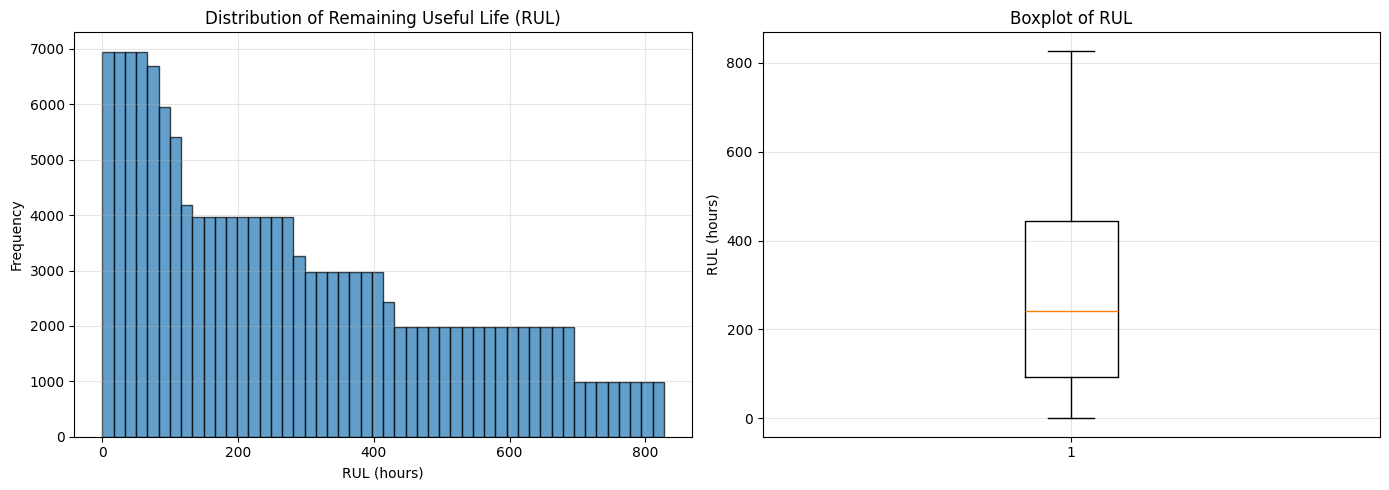

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_rul['rul'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('RUL (hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Remaining Useful Life (RUL)')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df_rul['rul'])
axes[1].set_ylabel('RUL (hours)')
axes[1].set_title('Boxplot of RUL')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [150]:
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

sensor_cols.remove('sensor_15')
sensor_cols.remove('sensor_50')
correlations_with_rul = df_rul[sensor_cols].corrwith(df_rul['rul']).sort_values(ascending=False)
print("\nTop 10 Positive Correlations with RUL:")
print(correlations_with_rul.head(10))
print("\nTop 10 Negative Correlations with RUL:")
print(correlations_with_rul.tail(10))



CORRELATION ANALYSIS

Top 10 Positive Correlations with RUL:
sensor_02    0.320281
sensor_29    0.194452
sensor_01    0.167925
sensor_10    0.162472
sensor_04    0.153823
sensor_37    0.142707
sensor_17    0.123782
sensor_42    0.122916
sensor_00    0.115237
sensor_22    0.112242
dtype: float64

Top 10 Negative Correlations with RUL:
sensor_07   -0.091346
sensor_44   -0.096829
sensor_35   -0.101236
sensor_05   -0.106229
sensor_40   -0.122303
sensor_30   -0.135889
sensor_06   -0.150692
sensor_13   -0.162603
sensor_08   -0.184438
sensor_11   -0.203870
dtype: float64


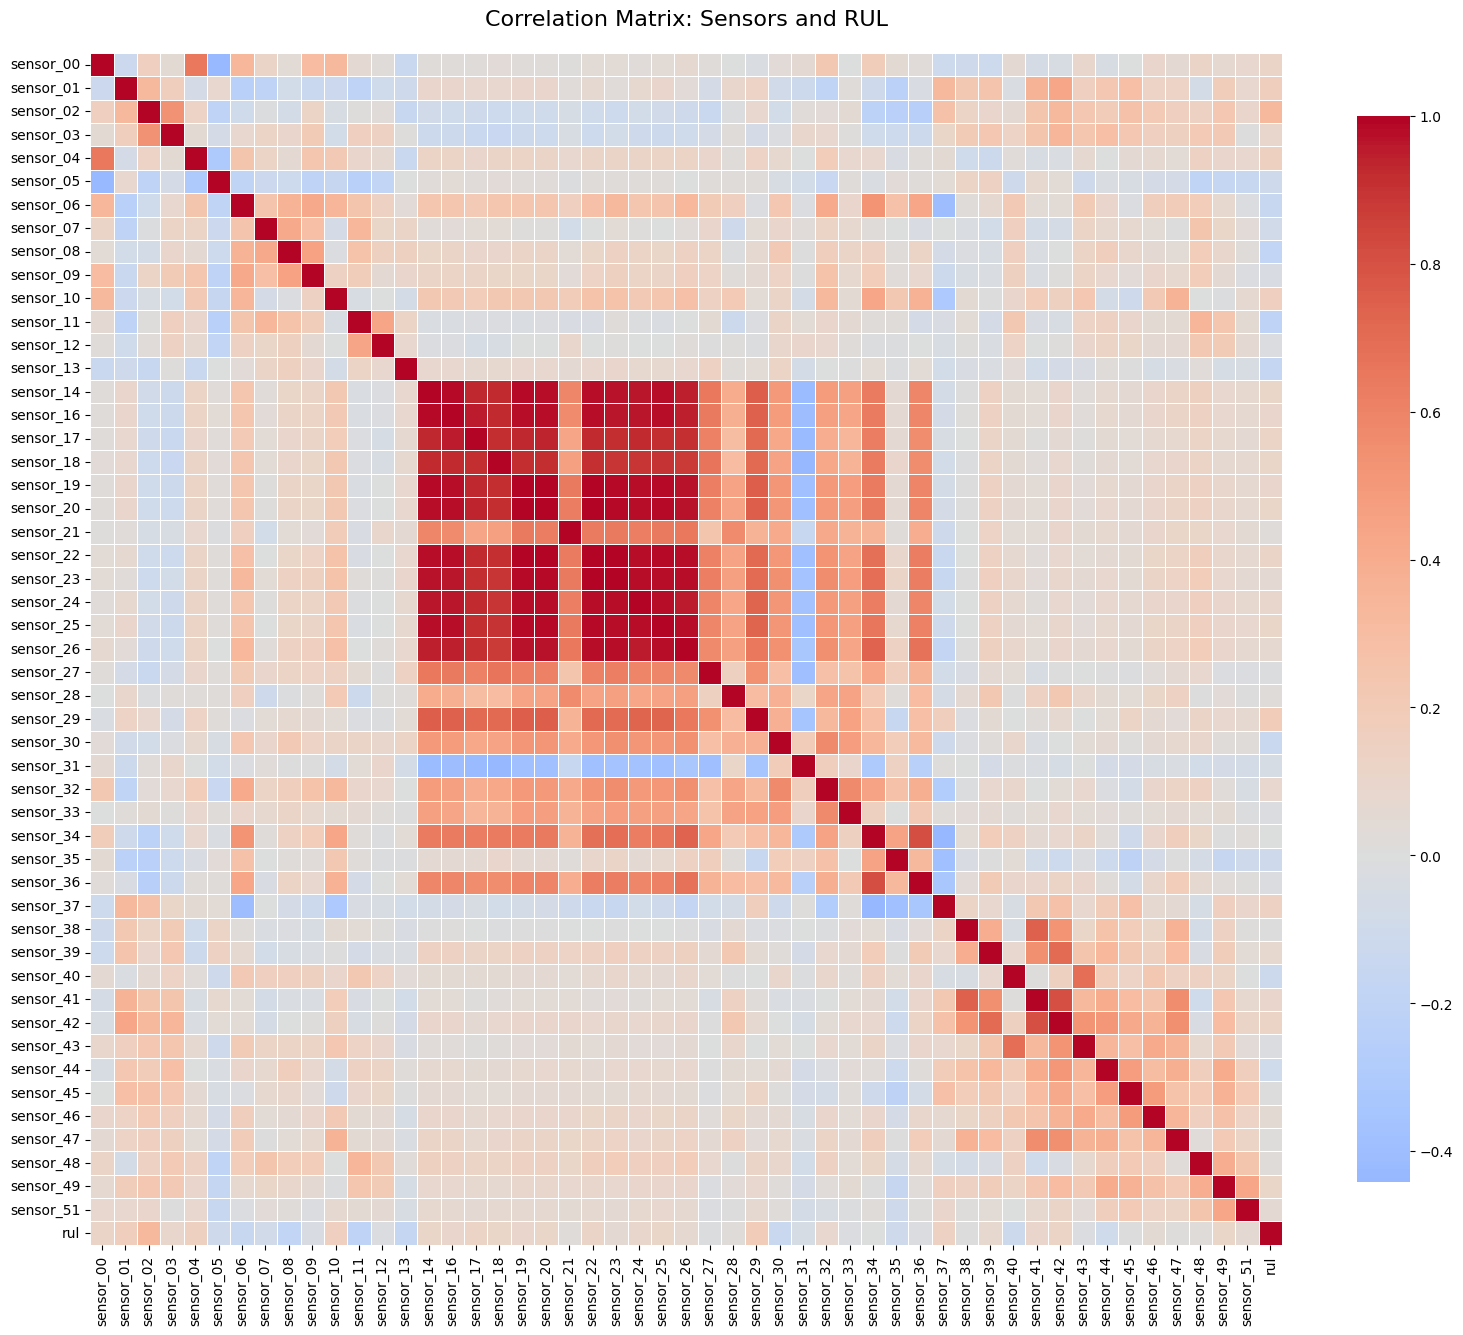

In [151]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(16, 14))
correlation_matrix = df_rul[sensor_cols + ['rul']].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
			square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Correlation Matrix: Sensors and RUL', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


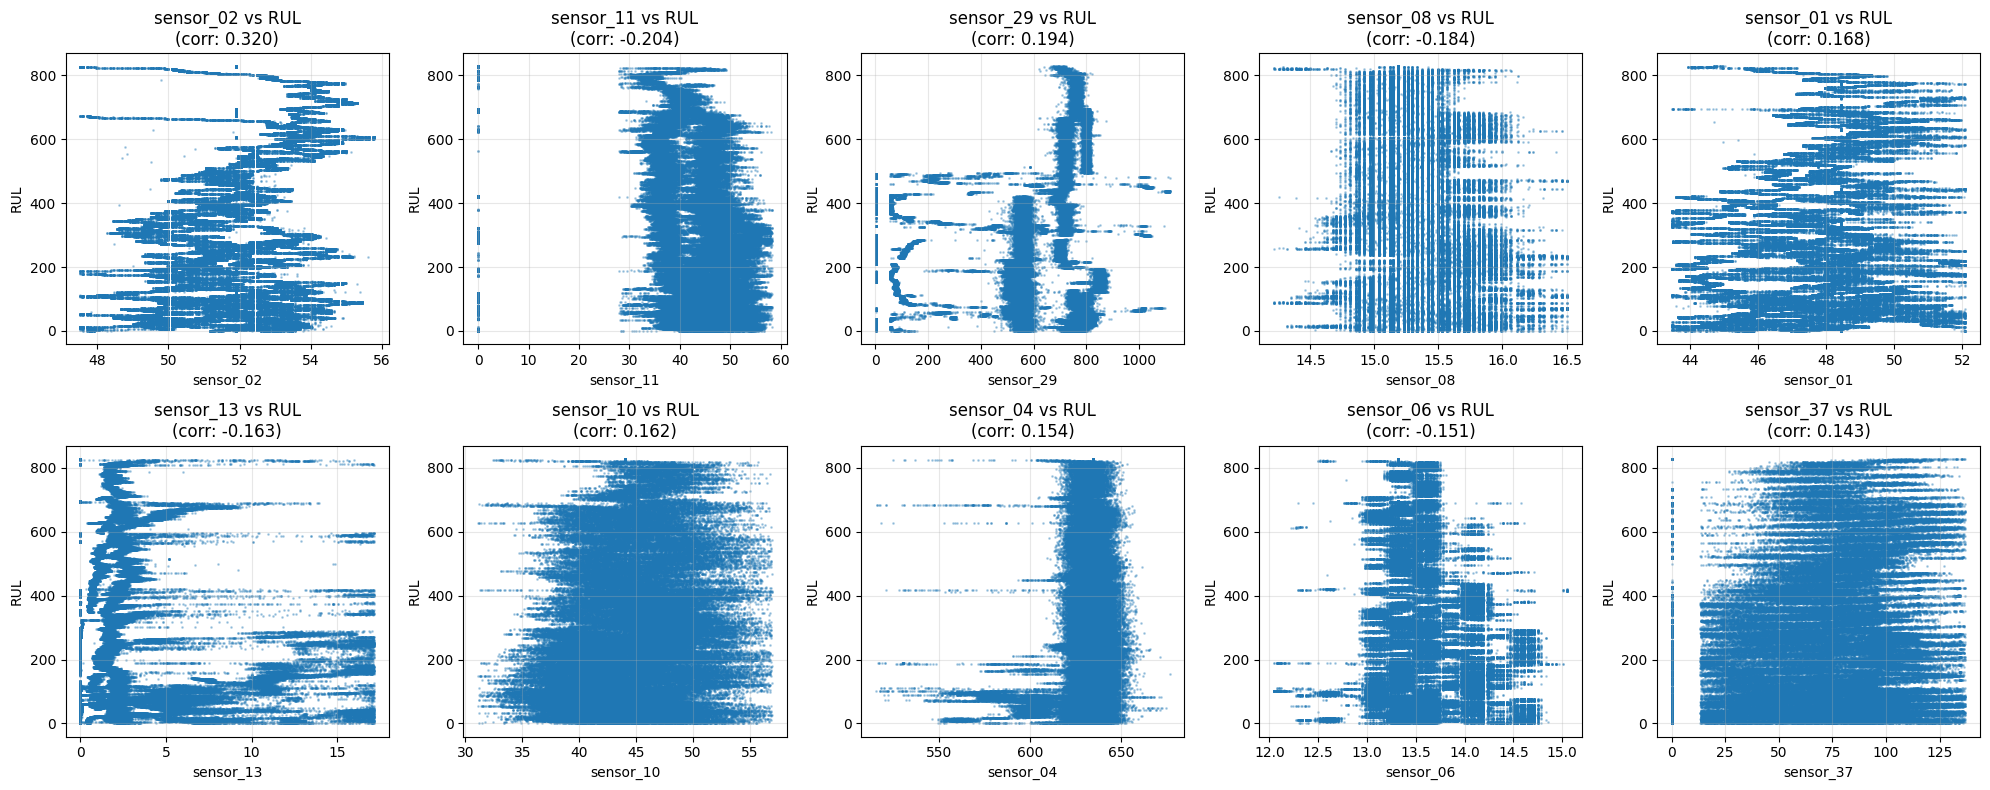

In [152]:
# 9. Visualization: Top Correlated Features with RUL
top_features = correlations_with_rul.abs().sort_values(ascending=False).head(10).index.tolist()
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
	axes[idx].scatter(df_rul[feature], df_rul['rul'], alpha=0.3, s=1)
	axes[idx].set_xlabel(feature)
	axes[idx].set_ylabel('RUL')
	axes[idx].set_title(f'{feature} vs RUL\n(corr: {correlations_with_rul[feature]:.3f})')
	axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()